## Summary

<p>
This project is predicting income with random forest models using 
<a href= "https://scikit-learn.org/stable/modules/tree.html">
scikit learn.</a> Random Forests are still state of the art
algorithms for binary classification.
</p>
<p>
The project is using the RandomForestClassifier, fits different forest models and makes predictions. It is applying metrics like accuracy and auc. It is also adopting train-test-splits, decision tree visualization with export_graphviz, cross-validation and hyperparameter tuning with grid search.
</p>
<p>
The data set is taken from the 
<a href = "http://archive.ics.uci.edu/ml/datasets/Adult">Center for Machine Learning and Intelligent 
Systems</a>.
</p>


## Import packages

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
import seaborn as sns
import numpy as np
import math
import os
import pydotplus

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import sklearn
print("SKlearn version: ", sklearn.__version__)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree.export import export_text

SKlearn version:  0.20.3


## Import data

In [94]:
income = pd.read_csv("income.csv", index_col=False)

## Explore data

In [95]:
income.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [96]:
income.tail(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [97]:
income.shape

(32561, 15)

In [98]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income'],
      dtype='object')

In [99]:
income.index

RangeIndex(start=0, stop=32561, step=1)

In [100]:
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

In [101]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
high_income       32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [102]:
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Missing values?

In [103]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

#### Data visualizations - numeric variables

In [104]:
income_numerics = income.iloc[:,np.r_[0, 2, 4, 10:13]]
income_numerics.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40


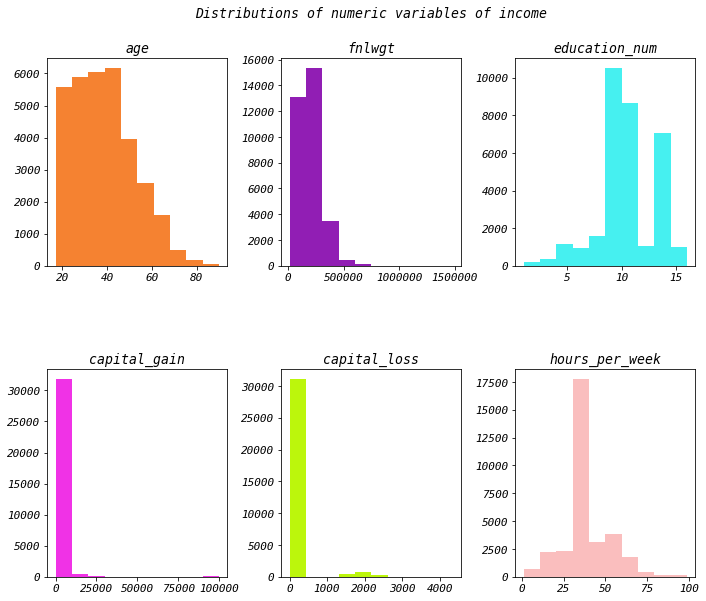

In [105]:
# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

np.warnings.filterwarnings('ignore')

income_numerics_names=list(income_numerics.columns)

fig, axs = plt.subplots(2,3, figsize=(15,9))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)

axs = axs.ravel()
fig.suptitle('Distributions of numeric variables of income')


for i in range(0,6):
    axs[i].hist(income_numerics.iloc[:,i], color=color_list[i])
    axs[i].set_title(income_numerics_names[i])
plt.show()

In [106]:
income_numerics_corr_matrix=income_numerics.corr()
income_numerics_corr_matrix.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123


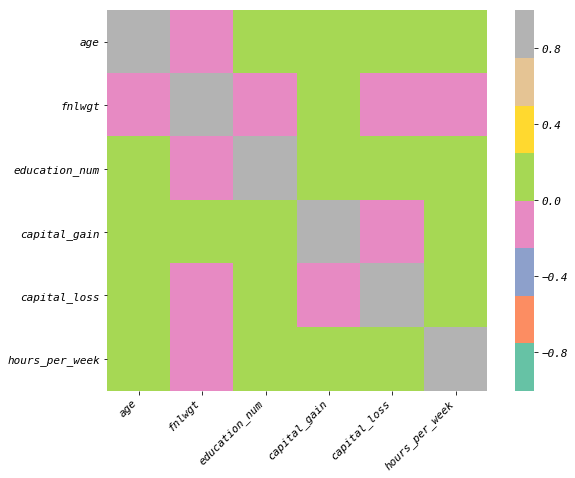

In [107]:

dimensions_1 = (10, 7)
fig, ax = plt.subplots(figsize=dimensions_1)

ax = sns.heatmap(
    income_numerics_corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap="Set2",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Data visualizations - categorical variables

In [108]:
income_cat = income.iloc[:,np.r_[1, 3, 4:10, 13:15]]
print(income_cat.shape)
income_cat.head(3)

(32561, 10)


,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,high_income
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [109]:
income['high_income'].value_counts()

 <=50K    24720
 >50K      7841
Name: high_income, dtype: int64

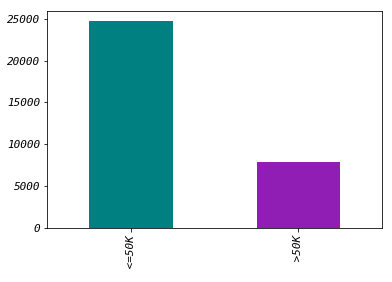

In [110]:
income['high_income'].value_counts().plot(kind="bar", color=['#008080', '#911eb4'])

In [111]:
income_cat.iloc[:,1].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

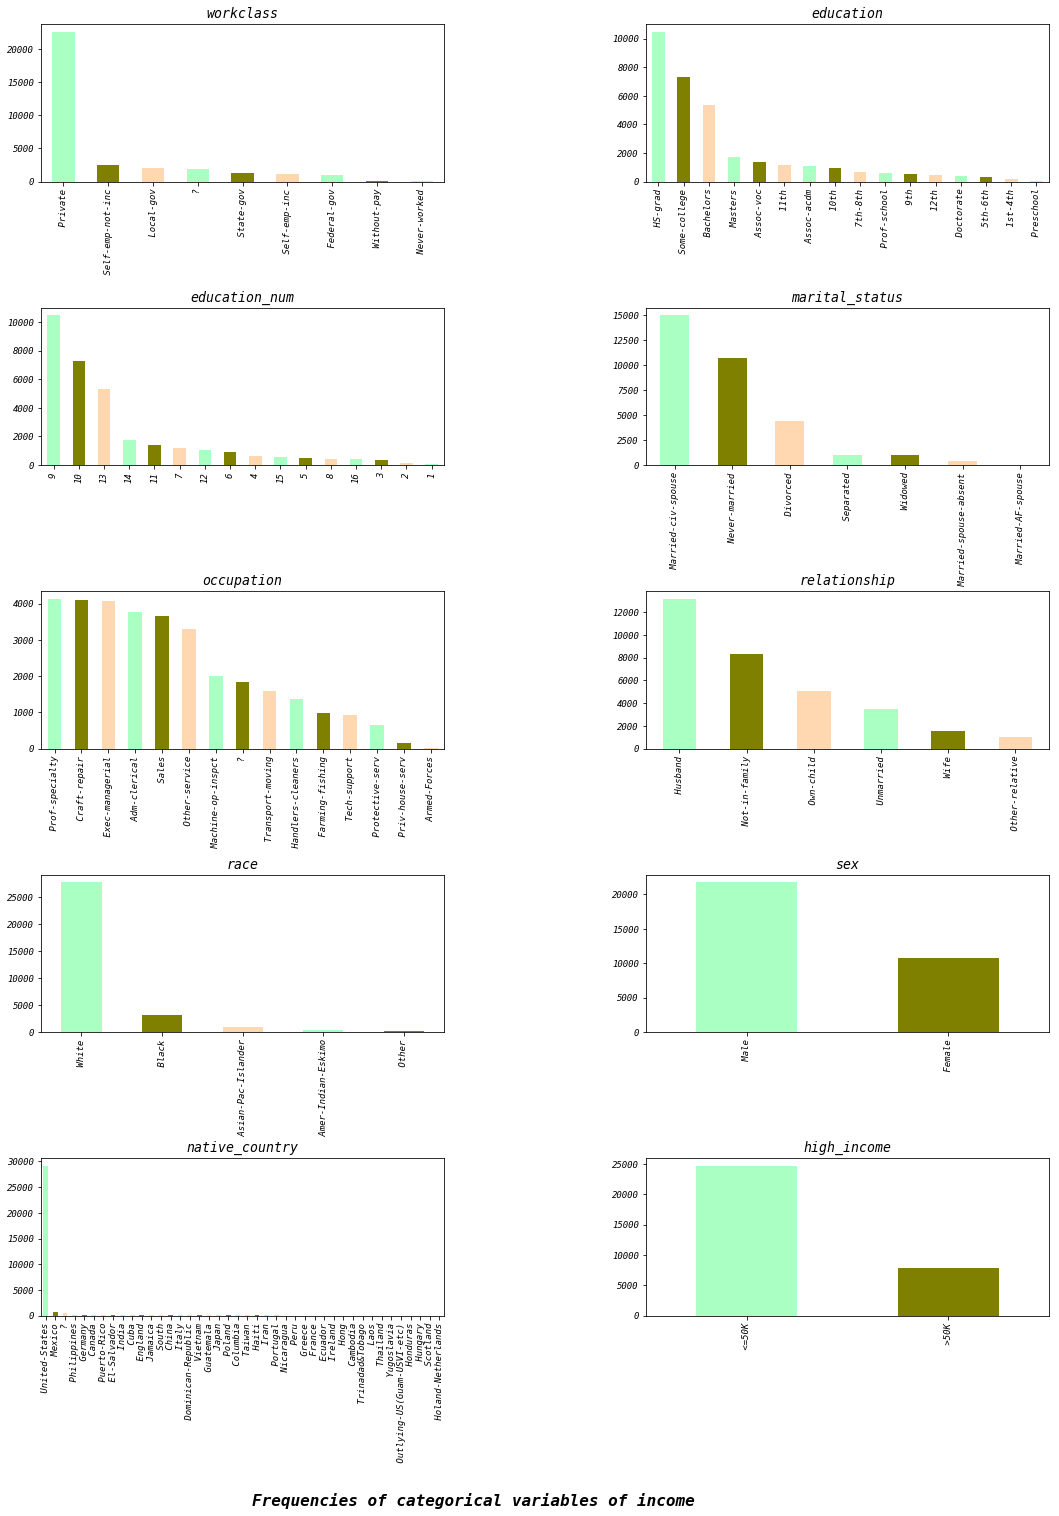

In [112]:
# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

np.warnings.filterwarnings('ignore')

income_cat_names=list(income_cat.columns)

fig, axs = plt.subplots(5,2, figsize=(20,6))
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.8, top=3, wspace=.5, hspace=0.8)

axs = axs.ravel()
fig.suptitle('Frequencies of categorical variables of income',  x=0.4, y=-0.4, fontsize=16, fontweight="heavy")


for i in range(0,10):
    for n in color_list:
        # axs[i].bar(x=income_cat.iloc[:,i].unique(), height=income_cat.iloc[:,i], color=color_list[i])
        income_cat.iloc[:,i].value_counts().plot(kind="bar", ax=axs[i], color=['#aaffc3', '#808000', '#ffd8b1'],
                                                 title=income_cat_names[i], rot=90, fontsize=9)
    # axs[i].set_title(income_cat_names[i])
plt.show()

#### Aggregations

In [113]:
income_age = income.groupby('age')[['capital_gain', 'capital_loss', 'hours_per_week']].aggregate([
                                    'mean', 'std', 'median', 'min', 'max', 'count']).T

income_age.head(3)

age                           17           18           19           20  \
capital_gain mean     109.691139   102.058182    92.092697    82.786189   
             std     1722.554867  1478.176635  1412.892408  1282.429902   
             median     0.000000     0.000000     0.000000     0.000000   

age                           21           22          23           24  \
capital_gain mean     204.625000   352.631373  103.099202   280.729323   
             std     3751.053585  5176.907626  806.897255  3682.241765   
             median     0.000000     0.000000    0.000000     0.000000   

age                           25           26  ...           80          81  \
capital_gain mean     279.297265   341.630573  ...   546.090909  249.900000   
             std     1725.834497  3724.769426  ...  2266.637638  782.134051   
             median     0.000000     0.000000  ...     0.000000    0.000000   

age                   82           83   84   85   86   87   88           90  
capital_gain mean    0.0  3341.833333  0.0  0.0  0.0  0.0  0.0  1935.255814  
             std     0.0  8185.786472  0.0  0.0  NaN  NaN  0.0  4863.944554  
             median  0.0     0.000000  0.0  0.0  0.0  0.0  0.0     0.000000  

[3 rows x 73 columns]

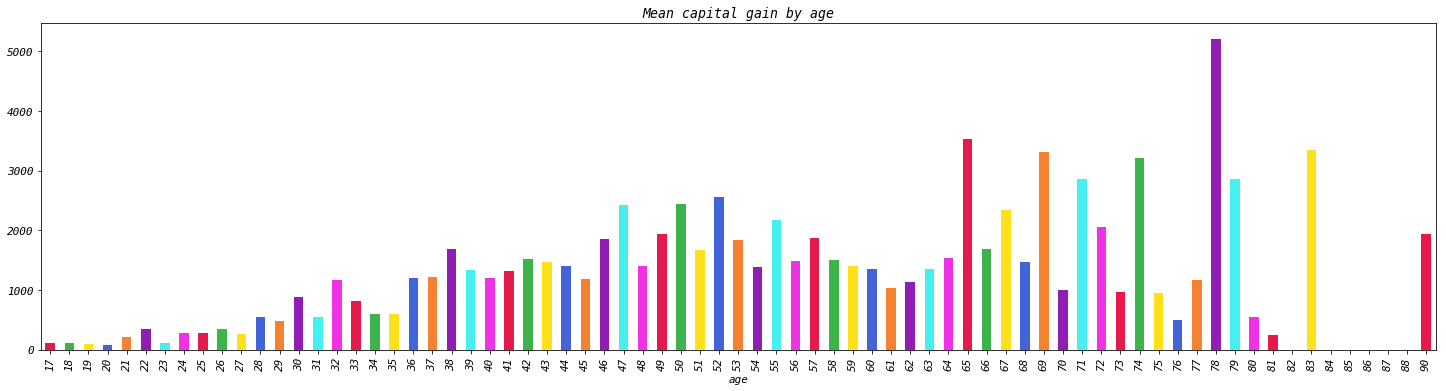

In [114]:
income_age.loc[('capital_gain', 'mean'),:].plot(kind="bar", figsize=(25,6), title="Mean capital gain by age",
                                                color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6'])

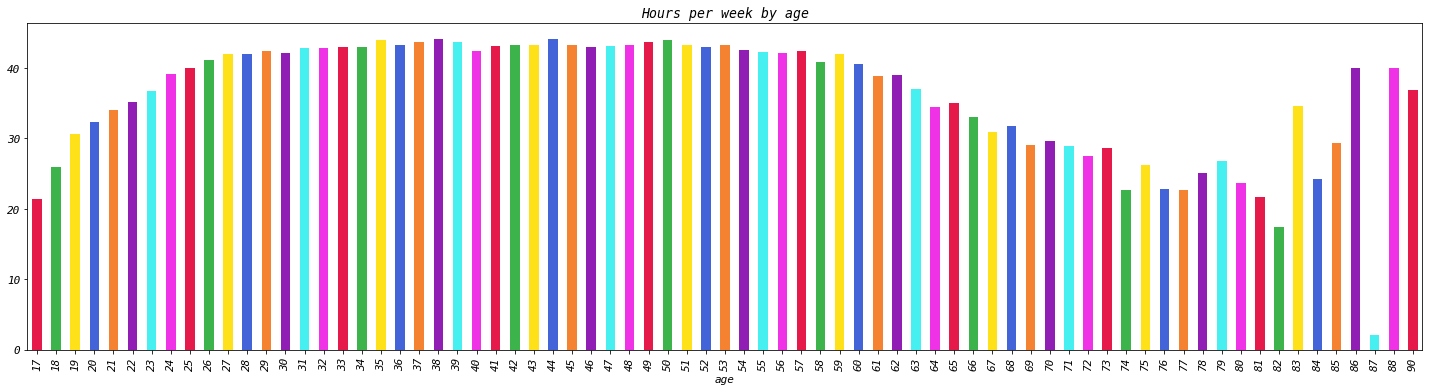

In [115]:
income_age.loc[('hours_per_week', 'mean'),:].plot(kind="bar", figsize=(25,6), title="Hours per week by age",
                                                color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6'])

#### Converting categorical variables into numerical variables.

In [116]:
income_2 = income.copy()
income_2.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

In [117]:
numeric_sex = pd.Categorical(income_2.sex)
income_2['sex']=numeric_sex.codes
print(income.sex.head(5))
print(income_2.sex.head(5))

0       Male
1       Male
2       Male
3       Male
4     Female
Name: sex, dtype: object
0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int8


In [118]:
if type(income_2.loc[5,'race']) == str:
    print('test')
else:
    print('test_2')

test


In [119]:
income_2_names = list(income_2.columns)
for name in income_2_names:
    if type(income_2.loc[5, name])==str:
        numeric = pd.Categorical(income_2.loc[:,name])
        income_2[name] = numeric.codes

In [120]:
print(income_2.dtypes)
# conversion was successful

age               int64
workclass          int8
fnlwgt            int64
education          int8
education_num     int64
marital_status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country     int8
high_income        int8
dtype: object


In [121]:
income_2.loc[0:3, income_cat.columns]

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,high_income
0,7,9,13,4,1,1,4,1,39,0
1,6,9,13,2,4,0,4,1,39,0
2,4,11,9,0,6,1,4,1,39,0
3,4,1,7,2,6,0,2,1,39,0


Categorical variables are coded with numbers and not longer with strings.

## Data modeling

### Random forest of two decision trees

In [122]:
variables_1 = list(income_2.columns)
variables_1.remove('high_income')
print(variables_1)
features_1 = income_2[variables_1]
print(features_1.shape)

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
(32561, 14)


In [123]:
label_1 = income_2.high_income
print(label_1[:2])
print(len(label_1))

0    0
1    0
Name: high_income, dtype: int8
32561


#### Set up a train-test-split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [124]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, label_1, random_state=32, test_size=0.3)

In [125]:
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(22792, 14)
(9769, 14)
(22792,)
(9769,)


#### First decision tree

In [126]:
# Initiate classifier
clf_1 = DecisionTreeClassifier(random_state=42, min_samples_leaf=6)
# Fit classifier to the training data
clf_1 = clf_1.fit(X_train_1, y_train_1)

#### Making a function to plot decision trees

In [127]:
def plot_decision_tree(clf,fn, cn, maxd=None):
    # Create DOT data
    dot_data = tree.export_graphviz(clf , out_file=None, 
                                feature_names=fn,
                                class_names=cn,
                                max_depth=maxd)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  
    # Adjust size
    graph.write_png('original_tree.png')
    graph.set_size('"16!"')
    graph.write_png('resized_tree.png')
    # Show graph
    image = Image(graph.create_png())
    return image

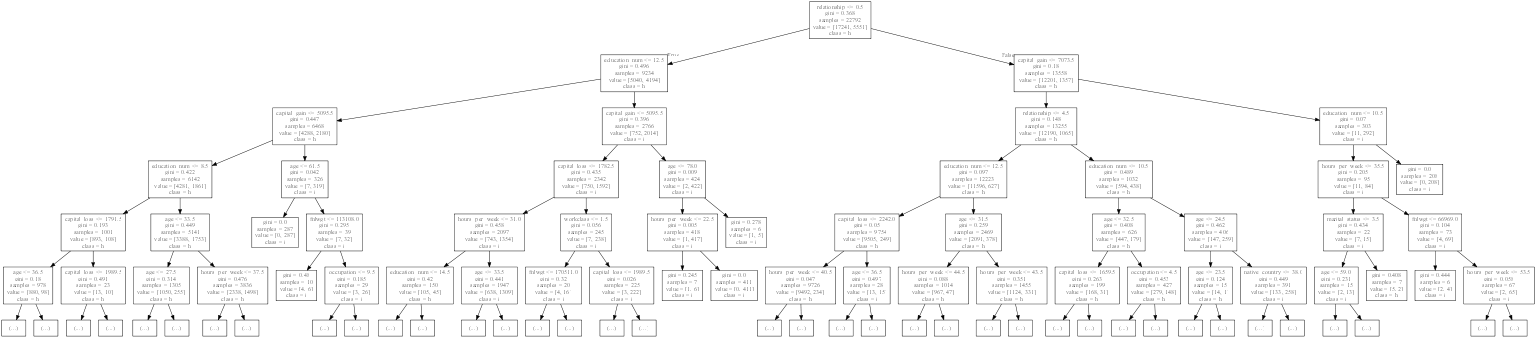

In [128]:
plot_decision_tree(clf_1, variables_1,'high_income' , maxd=5)

In [129]:
# Make predictions
pred_1 = clf_1.predict(X_train_1)
print(pred_1[:4])
pred_2 = clf_1.predict(X_test_1)
print(pred_2[:4])

# Evaluate
auc_1_train = roc_auc_score(y_train_1, pred_1)
auc_1_test = roc_auc_score(y_test_1, pred_2)

print(auc_1_train)
print(auc_1_test)

[1 1 0 0]
[0 0 0 1]
0.8556524876586377
0.7500829396546137


With min_samples_leaf=6 the auc is 0.75.

#### Making a function to plot the roc curve

In [130]:

def plot_roc_curve(y_train_variable, pred_variable):
    false_positive_rate, true_positive_rate, thresholds_t1_test = roc_curve(y_train_variable, pred_variable)
    roc_auc_t1_test = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'orange',
    label='AUC = %0.2f'% roc_auc_t1_test)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

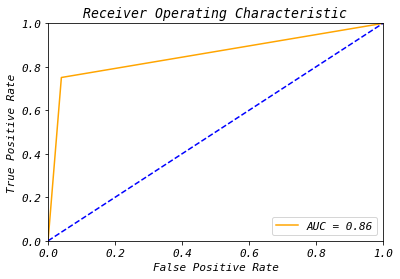

In [131]:
plot_roc_curve(y_train_1, pred_1)

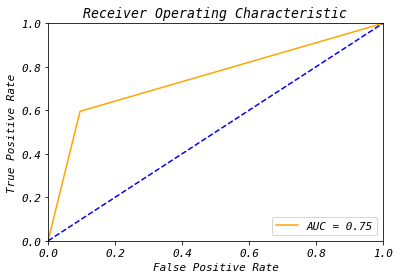

In [132]:
plot_roc_curve(y_test_1, pred_2)

#### Second decision tree

In [133]:
# Initiate classifier
clf_2 = DecisionTreeClassifier(random_state=42, max_depth=7)
# Fit classifier to the training data
clf_2 = clf_2.fit(X_train_1, y_train_1)



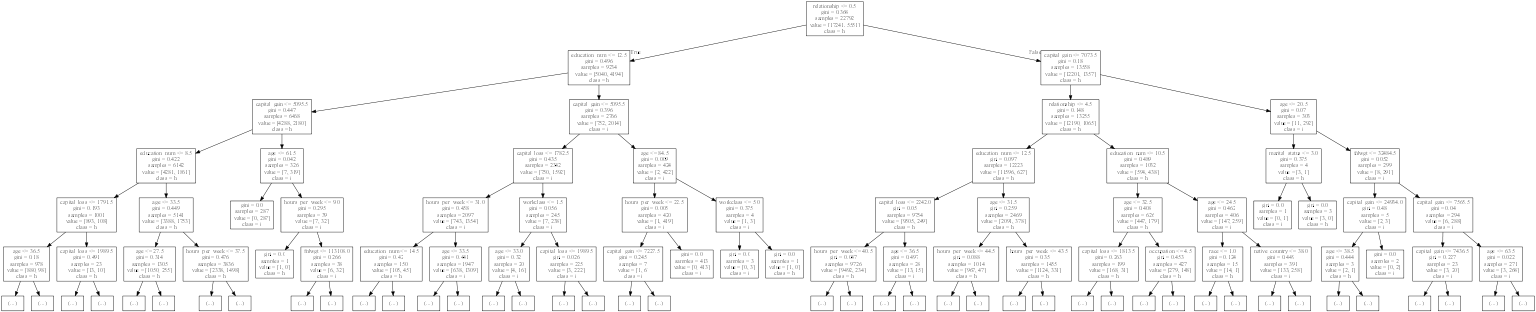

In [134]:
plot_decision_tree(clf_2, variables_1,'high_income' , maxd=5)

In [135]:
# Make predictions
pred_3 = clf_2.predict(X_train_1)
print(pred_3[:4])
pred_4 = clf_2.predict(X_test_1)
print(pred_4[:4])

# Evaluate
auc_2_train = roc_auc_score(y_train_1, pred_3)
auc_2_test = roc_auc_score(y_test_1, pred_4)
print(auc_2_train )
print(auc_2_test)


[1 0 0 0]
[0 0 0 1]
0.7499992868695572
0.7499771120418102


With max_depth=7 the auc is 0.7499.

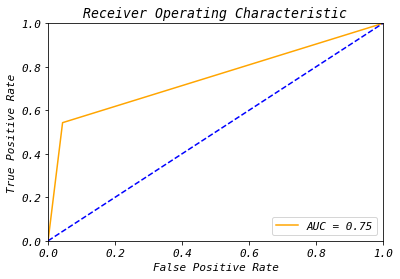

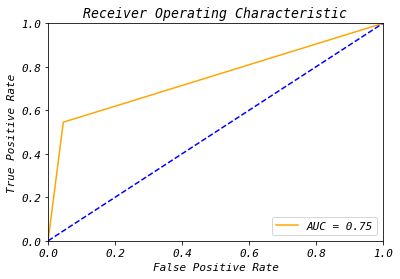

In [136]:
plot_roc_curve(y_train_1, pred_3)
plot_roc_curve(y_test_1, pred_4)

Calculate predicted probabilities.

In [137]:
pred_5 = clf_1.predict_proba(X_test_1)[:,1]
pred_6 = clf_2.predict_proba(X_test_1)[:,1]
print(pred_5[:5])
print(pred_5.shape)
print(pred_6[:5])
print(pred_6.shape)

[0. 0. 0. 1. 0.]
(9769,)
[0.02876235 0.02876235 0.00352423 0.74531835 0.00352423]
(9769,)


In [138]:
dict_1 = {"pred_5": pred_5, "pred_6":pred_6}
df_1 = pd.DataFrame(data=dict_1)
print(df_1.head())
print(df_1.shape)

   pred_5    pred_6
0     0.0  0.028762
1     0.0  0.028762
2     0.0  0.003524
3     1.0  0.745318
4     0.0  0.003524
(9769, 2)


Average the predictions of two decision trees.

In [139]:
pred_12_mean = np.round((pred_5+pred_6)/2)
df_1['mean'] = pred_12_mean
print(df_1.head())
print(df_1.shape)

   pred_5    pred_6  mean
0     0.0  0.028762   0.0
1     0.0  0.028762   0.0
2     0.0  0.003524   0.0
3     1.0  0.745318   1.0
4     0.0  0.003524   0.0
(9769, 3)


In [140]:
tn, fp, fn, tp = confusion_matrix(y_test_1, pred_12_mean).ravel()
print(tn, fp, fn, tp)

6885 594 869 1421


In [141]:
target_names = ['class 0', 'class 1']
classification_report(y_test_1, pred_12_mean, target_names=target_names)

'              precision    recall  f1-score   support\n\n     class 0       0.89      0.92      0.90      7479\n     class 1       0.71      0.62      0.66      2290\n\n   micro avg       0.85      0.85      0.85      9769\n   macro avg       0.80      0.77      0.78      9769\nweighted avg       0.85      0.85      0.85      9769\n'

In [142]:
auc_mean = roc_auc_score(y_test_1, pred_12_mean)
auc_mean= round(auc_mean, 4)
auc_mean

0.7706

In [143]:
dict_2 ={"auc_1_test":auc_1_test, "auc_2_test":auc_2_test, "auc_mean":auc_mean}
df_2 = pd.DataFrame(data=dict_2, index=[1])
df_2 

,auc_1_test,auc_2_test,auc_mean
1,0.750083,0.749977,0.7706


Averaging over two decision trees generated a better auc with auc_mean.

#### Adding a third decision tree

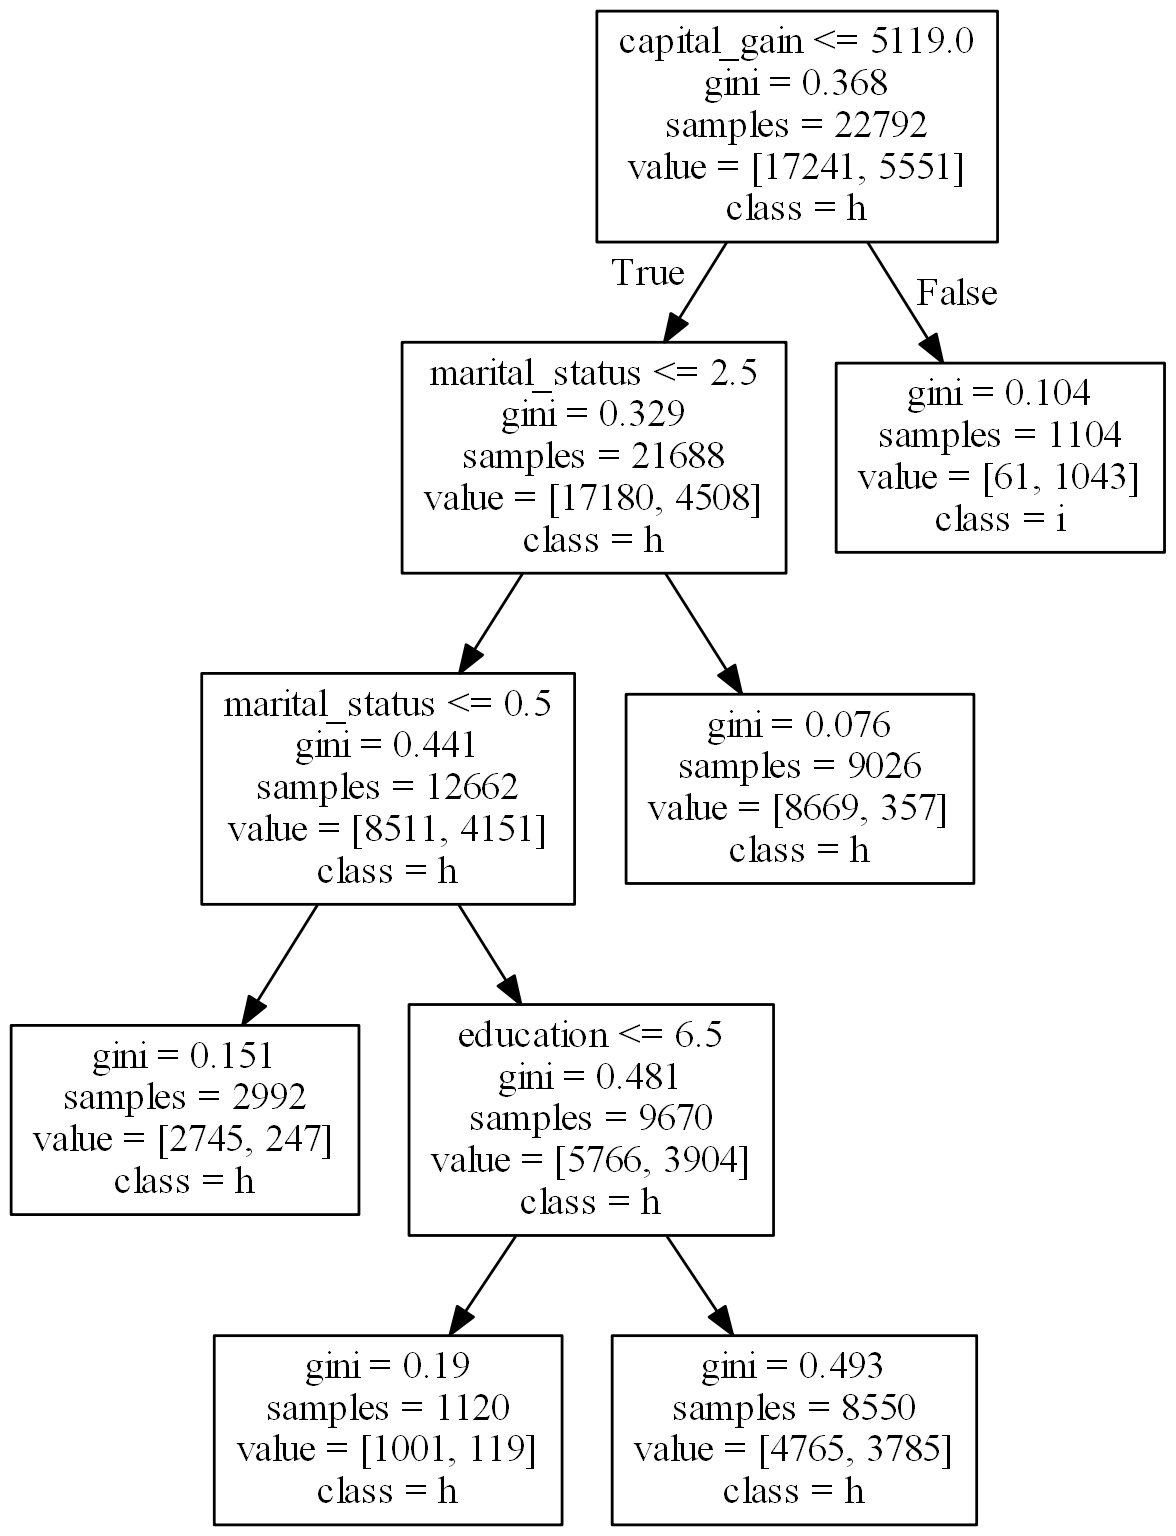

In [144]:
# Initiate classifier
clf_3 = DecisionTreeClassifier(random_state=42,  min_samples_split=4, max_features=7,
                               max_leaf_nodes=5, max_depth=8)
# Fit classifier to the training data
clf_3 = clf_3.fit(X_train_1, y_train_1)

plot_decision_tree(clf_3, variables_1,'high_income' , maxd=5)


In [145]:
# Make predictions
pred_7 = clf_3.predict(X_train_1)
print(pred_7[:4])
pred_8 = clf_3.predict(X_test_1)
print(pred_8[:4])

# Evaluate
auc_3_train = roc_auc_score(y_train_1, pred_3)
auc_3_test = roc_auc_score(y_test_1, pred_4)
print(auc_3_train )
print(auc_3_test)

[1 0 0 0]
[0 0 0 0]
0.7499992868695572
0.7499771120418102


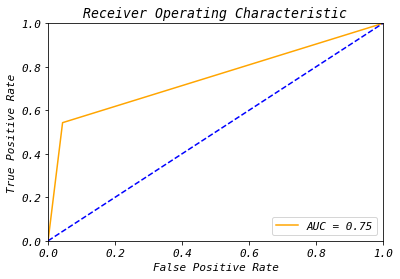

In [146]:
plot_roc_curve(y_train_1, pred_3)

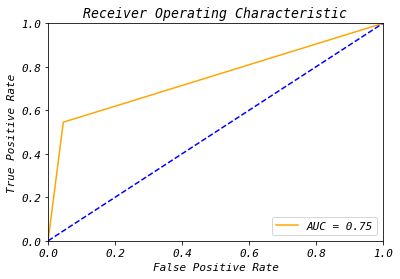

In [147]:
plot_roc_curve(y_test_1, pred_4)

In [148]:
pred_9 = clf_3.predict_proba(X_test_1)[:,1]
print(pred_7[:5])

print(pred_9.shape)
print(pred_5.shape)
print(pred_6.shape)

[1 0 0 0 0]
(9769,)
(9769,)
(9769,)


In [149]:
pred_123_mean = np.round((pred_5+pred_6+pred_9)/3)
print(pred_123_mean.shape)

(9769,)


In [150]:
dict_2= {"pred_5": pred_5, "pred_6":pred_6, "pred_9":pred_9, "pred_123_mean":pred_123_mean}
df_3 = pd.DataFrame(data=dict_2)
df_3.head()

,pred_5,pred_6,pred_9,pred_123_mean
0,0.0,0.028762,0.039552,0.0
1,0.0,0.028762,0.082553,0.0
2,0.0,0.003524,0.039552,0.0
3,1.0,0.745318,0.442690,1.0
4,0.0,0.003524,0.039552,0.0


In [151]:
auc_mean_2 = roc_auc_score(y_test_1, pred_123_mean)
auc_mean_2 = round(auc_mean_2, 4)
auc_mean_2 

0.7632

In [152]:
dict_3 ={"auc_1_test":auc_1_test, "auc_2_test":auc_2_test, "auc_mean":auc_mean,
         "auc_mean_2":auc_mean_2}
df_3 = pd.DataFrame(data=dict_3, index=[1])
df_3 

,auc_1_test,auc_2_test,auc_mean,auc_mean_2
1,0.750083,0.749977,0.7706,0.7632


### Applying the RandomForestClassifier of sklearn

Hyperparameter tuning: The n_estimators or trees is 150.

In [153]:
clf_4=RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_leaf=2, 
                             random_state=47)
# X_train_1, X_test_1, y_train_1, y_test_1 
clf_4 = clf_4.fit(X_train_1,  y_train_1)

In [154]:
print(clf_4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False)


Plot a decision tree of the random forest. This is only for illustration reasons and
to derive any conclusion. As there are 150 trees or estimators one estimator does
not say much about the classification.

In [155]:
estimator_1 = clf_4.estimators_[67]
estimator_1 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1489685594, splitter='best')

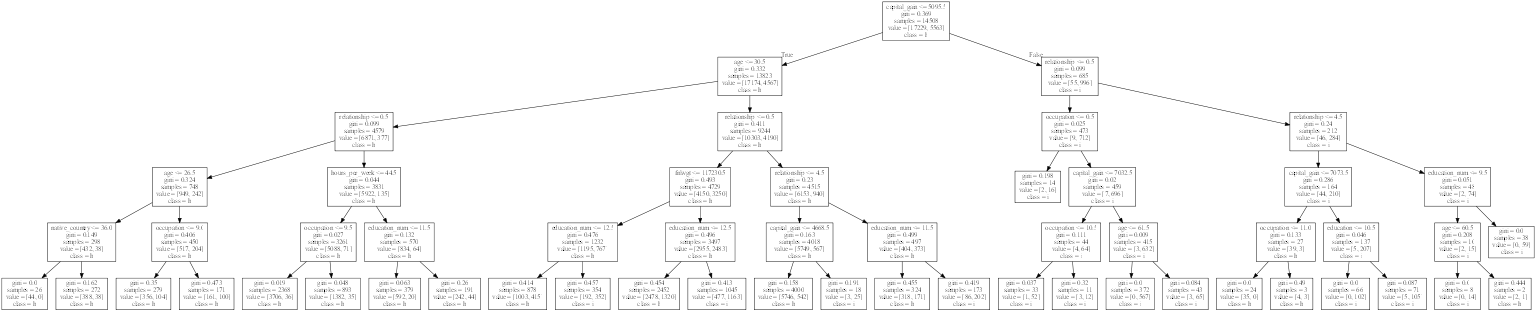

In [156]:
plot_decision_tree(estimator_1, variables_1,'high_income' , maxd=5)

In [157]:
clf_4_important = clf_4.feature_importances_
print(clf_4.feature_importances_)

[0.07622805 0.00245398 0.00135341 0.02342667 0.16407801 0.18512303
 0.01517545 0.20870121 0.00115536 0.02359523 0.21689261 0.0348363
 0.04630426 0.00067644]


In [158]:
dict_4 = {"Features":variables_1, "Importance": clf_4_important}
df_4 = pd.DataFrame(data=dict_4)
df_4.sort_values(by='Importance', ascending=False)

,Features,Importance
10,capital_gain,0.216893
7,relationship,0.208701
5,marital_status,0.185123
4,education_num,0.164078
0,age,0.076228
12,hours_per_week,0.046304
11,capital_loss,0.034836
9,sex,0.023595
3,education,0.023427
6,occupation,0.015175


Capital gain is the most important feature.

In [159]:
pred_9 = clf_4.predict(X_test_1)
pred_10 = clf_4.predict(X_test_1)

In [160]:
acc_1 = accuracy_score(y_test_1, pred_9 )
acc_2 = accuracy_score(y_test_1, pred_10)
print(acc_1)
print(acc_2)

0.8533114955471389
0.8533114955471389


In [161]:
auc_33=roc_auc_score(y_test_1, pred_9 )
auc_34=roc_auc_score(y_test_1, pred_10)
print(auc_33)
print(auc_34)

0.7324124433420857
0.7324124433420857


Hyperparameter tuning: The n_estimators or trees is 300.

In [162]:
clf_5=RandomForestClassifier(n_estimators=350, max_depth=5, min_samples_leaf=2, 
                             random_state=47)


In [163]:
print(clf_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False)


In [164]:
clf_5= clf_5.fit(X_train_1,  y_train_1)

In [165]:
pred_11 = clf_5.predict(X_test_1)
pred_12 = clf_5.predict(X_test_1)

In [166]:
acc_3 = accuracy_score(y_test_1, pred_11 )
acc_4 = accuracy_score(y_test_1, pred_12)
print(acc_3)
print(acc_4)

0.8550516941345071
0.8550516941345071


The accuracy show a clear improvement with 350 trees.

In [167]:
auc_44=roc_auc_score(y_test_1, pred_11)
auc_45=roc_auc_score(y_test_1, pred_12)
print(auc_44)
print(auc_45)

0.7349123397040097
0.7349123397040097


The auc shows a slight improvement.

### Hyperparameter tuning with GridSearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Cross validated grid search model 1

In [168]:
# define a param grid
param_grid = {'max_depth': np.arange(3, 10), 'n_estimators':[50, 100, 150, 200, 250]}

clf_5555 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=7)
clf_5555.fit(X_train_1, y_train_1)

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'n_estimators': [50, 100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
clf_5555_preds = clf_5555.predict_proba(X_test_1)[:, 1]
clf_5555_auc = roc_auc_score(y_test_1, clf_5555_preds)
print ('Evaluation of clf_5555: Area under the ROC curve = {}'.format(clf_5555_auc))

Decisionclf_5555: Area under the ROC curve = 0.9149239705235794


In [170]:
clf_5555_preds_binary = clf_5555.predict(X_test_1)
clf_5555_accuracy = accuracy_score(y_test_1, clf_5555_preds_binary)
print ('Evaluation of clf_5555: Accuracy = {}'.format(clf_5555_accuracy))

Decisionclf_5555: Accuracy = 0.8618077592384072


In [171]:
# score(self, X, y=None)
# This uses the score defined by scoring where provided, 
# and the best_estimator_.score method otherwise.
clf_5555_score = clf_5555.score(X_train_1, y_train_1)
print ('Evaluation of clf_5555: best_estimator_.score method = {}'.format(clf_5555_score))

Decisionclf_5555: best_estimator_.score method = 0.8631537381537382


In [210]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.score

print(clf_5555.best_estimator_)
# best_params_ defined in the dictionary
print(clf_5555.best_params_)
# best_score_: Mean cross-validated score of the best_estimator
print(clf_5555.best_score_)
clf_5555_best_score=clf_5555.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 200}
0.8556511056511057


The accuracy has increased substantially with all evaluation metrics.

#### Cross validated grid search model 2

In [200]:
n_estimators_input=list(np.arange(50,250,50))
print(n_estimators_input)
max_depth_input = list(np.arange(4,8,1))
print(max_depth_input)
min_samples_split_input = list(np.arange(2,10,2))
print(min_samples_split_input)
min_samples_leaf_input = list(np.arange(1,6,1))
print(min_samples_leaf_input)
bootstrap_input = [True, False]

[50, 100, 150, 200]
[4, 5, 6, 7]
[2, 4, 6, 8]
[1, 2, 3, 4, 5]


In [201]:
# Creating the param grid
param_grid_666 = {'n_estimators': n_estimators_input,
                  'max_depth': max_depth_input,
                  'min_samples_split': min_samples_split_input,
                  'min_samples_leaf': min_samples_leaf_input ,
                  'bootstrap': bootstrap_input}

print(param_grid_666)

{'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 5, 6, 7], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]}


In [202]:
clf_666 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_666, cv=3)
clf_666.fit(X_train_1, y_train_1)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 5, 6, 7], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [204]:
clf_666_preds = clf_666.predict_proba(X_test_1)[:, 1]
clf_666_auc = roc_auc_score(y_test_1, clf_666_preds)
print ('Evaluation of clf_666: Area under the ROC curve = {}'.format(clf_5555_auc))

Decisionclf_666: Area under the ROC curve = 0.9149239705235794


In [205]:
clf_666_preds_binary = clf_666.predict(X_test_1)
clf_666_accuracy = accuracy_score(y_test_1, clf_666_preds_binary)
print ('Evaluation of clf_666: Accuracy = {}'.format(clf_666_accuracy))

Decisionclf_666: Accuracy = 0.8590439144231754


In [207]:
clf_666_score = clf_666.score(X_train_1, y_train_1)
print ('Evaluation of clf_666: best_estimator_.score method = {}'.format(clf_666_score))

Evaluation of clf_666: best_estimator_.score method = 0.8572306072306072


In [213]:
print(clf_666.best_estimator_)
# best_params_ defined in the dictionary
print(clf_666.best_params_)
# best_score_: Mean cross-validated score of the best_estimator
print(clf_666.best_score_)
clf_666_best_score = clf_666.best_score_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
{'bootstrap': False, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8535451035451036


In [220]:
dict_677 = {'Metric': ['auc', 'accuracy', 'score', 'best_score'],
            'clf_5555': 
            [clf_5555_auc, clf_5555_accuracy, clf_5555_score, 
             clf_5555_best_score],
            'clf_666': [clf_666_auc, clf_666_accuracy, 
             clf_666_score, clf_666_best_score]
           }

dict_677 

{'Metric': ['auc', 'accuracy', 'score', 'best_score'],
 'clf_5555': [0.9149239705235794,
  0.8618077592384072,
  0.8631537381537382,
  0.8556511056511057],
 'clf_666': [0.910294472266159,
  0.8590439144231754,
  0.8572306072306072,
  0.8535451035451036]}

In [222]:
df_67 = pd.DataFrame(data=dict_677)

In [223]:
df_67 

,Metric,clf_5555,clf_666
0,auc,0.914924,0.910294
1,accuracy,0.861808,0.859044
2,score,0.863154,0.857231
3,best_score,0.855651,0.853545


The complex second model did not score better than the first model.